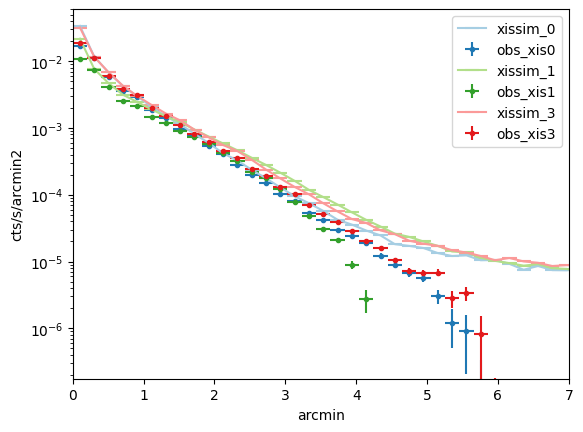

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_palette('Paired')

# bg = [317.622422, 532.9688346, 290.3213569]
# bg_exp = 982318486.1
pixarea = 2.316e-3**2*3600
thresh = 32
x = [0,1,3]
bg = [2e-5,3.5*1e-5,2e-5]
const = [1, 0.977365, 1.01774 ]
cxb = np.array([1.348E-01, 1.263E-01,1.348E-01 ])/400/3.14
workpath = '/Users/eusracenorth/Documents/suzaku_A222-223/xissim_test/v1223sgr/suzaku'
for i in range(3):
    # df = pd.read_csv(f'xis{x[i]}_obs.csv')
    df = pd.read_csv(f'{workpath}/xis{x[i]}_obs.csv')
    sb = df['ctr']#-cxb[i]
    sb_err = df['err']
    df = pd.read_csv(f'{workpath}/xis{x[i]}_xissim.csv')
    # df = pd.read_csv(f'xis{x[i]}_xissim.csv')
    xissim = df['ctr'] * const[i]
    r = np.linspace(0,20,100)
    r1 = r[0:thresh+1]
    plt.errorbar((r[0:-1]+np.diff(r)/2)[xissim!=0], xissim[xissim!=0],xerr = np.diff(r)[xissim!=0]/2,label = f'xissim_{x[i]}')
    plt.errorbar(r1[0:-1]+np.diff(r1)/2, sb[0:thresh]-bg[i], xerr = np.diff(r1)/2, yerr = sb_err[0:thresh], label = f'obs_xis{x[i]}',  fmt = '.')
    # plt.title(f'xis{x[i]}')
    plt.yscale('log')
    plt.ylabel('cts/s/arcmin2')
    # plt.xscale('log')
    plt.xlabel('arcmin')
    plt.legend()
    plt.xlim(0,7)
    # plt.axhline(2e-5)
    # plt.axhline(3.5*1e-5)


In [41]:
type(xissim[0])

list